# Final Exam

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 

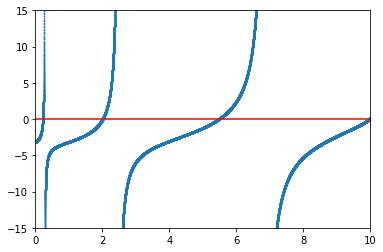

In [54]:
def func(E):
    f = np.sqrt(E)*np.tan(3*np.sqrt(E))-np.sqrt(10-E)
    return f

x = np.linspace(0, 14, 100000)
plt.scatter(x, func(x),s=0.5)
plt.xlim(0, 10)
plt.ylim(-15, 15)
plt.axhline(0, color='red')

우선 위와 같이 주어진 함수 f(E)의 개형을 그려보면 대략적으로 함수가 불연속해지는 지점과 해가 존재하는 위치를 대략적으로 추정해볼 수 있다. 이를 이용해서 (0, 0.5), (0,5, 3), (3,6), (8, 10) 4개의 구간에 대해서 Bisection Method를 사용하여 해를 구해볼 수 있다. 

In [56]:
def func(E):
    f = np.sqrt(E)*np.tan(3*np.sqrt(E))-np.sqrt(10-E)
    return f


def bisection_func(m, n):
    eps = 1.e-10
    a, b = m, n

    err = eps+1
    loop=0
    while(err>=eps):
        loop+=1
        if(loop>100): break
        fa=func(a)
        fb=func(b)
        c=0.5*(a+b)
        err=abs(c-a)
        fc=func(c)
        if (fa*fc<=0):
            b=c
        else:
            a=c

    print("loop={:2d}, The Root is {:.6f} err={:.5e}".format(loop, a, err))
    
bisection_func(0, 0.5)
bisection_func(0.5, 3)
bisection_func(3, 6)
bisection_func(8, 10)

loop=33, The Root is 0.224201 err=5.82077e-11
loop=35, The Root is 2.005149 err=7.27596e-11
loop=35, The Root is 5.476883 err=8.73115e-11
loop=35, The Root is 9.974886 err=5.82077e-11


## Problem 2 

### (a)

주어진 미분방정식에 문제에 주어진 값과 식들을 대입하면 다음과 같은 미분방정식을 얻는다. 

$\frac{\text{d}P}{\text{d}r}=1.9\frac{\text{d}n_{e}}{\text{d}r}k_{B}T+1.9\frac{\text{d}T}{\text{d}r}k_{B}n_{e}=-1.18n_{e}m_{H}\frac{\text{d}\Phi}{\text{d}r}$ 



$Lr^2 =\frac{\text{d}}{\text{d}r}(r
^{2}\times10^{-7}T^{5/2}\frac{\text{d}T}{\text{d}r})$ <br>
<br>
$
2r\times10^{-7}T^{5/2}\frac{\text{d}T}{\text{d}r}+r^2\times10^{-7}\times\frac{5}{2}T^{3/2}(\frac{\text{d}T}{\text{d}r})^2+r^2\times10^{-7}\times T^{5/2}\frac{\text{d}^2T}{\text{d}r^2} = 2.1\times10^{-27}n_{e}^{2}T^{1/2}r^{2}$

$\frac{2GM_{0}r^2}{(r+r_{c})(r+r_{s})^2}=2r\frac{\text{d}\Phi}{\text{d}r}+r^2\frac{\text{d}^2\Phi}{\text{d}r^2}$

위 식 들을 연립하여 나타내면 아래와 같은 식으로 나타낼 수 있다. 


$ \Phi'' = \frac{2GM_{0}}{(r+r_{c})(r+r_{s})^2}-\frac{2}{r}\Phi'$ <br>

 $n_{e}' = \frac{-1.18n_{e}m_{H}\Phi'-1.9T'k_{B}n_{e}}{1.9k_{B}T} $

<br> 
$T''=\frac{-2r\times10^{-7}T^{5/2}T'+2.1\times10^{-27}n_{e}^2T^{1/2}r^2-r^2\times10^{-7}\times5/2\times T ^{3/2}{T'}^2}{r^2\times10^{-7}\times T^{5/2}} $ 

이 때, 작은 값의 r에 대해서, taylor 전개를 활용하여 power series solution을 제시할 수 있다. 

$\Phi(r)=\sum_{m=0}^{\infty}a_{m}r^m$ <br>
$ n_{e}(r)=\sum_{m=0}^{\infty}b_{m}r^m $ <br>
$ T(r)=\sum_{m=0}^{\infty}c_{m}r^m $ <br>
로 두고, r은 작은 값이므로 $r^{3}$이상의 항은 무시하고 위에서 구한 미분방정식에 대입하여 계수 비교를 시행하면

$a_0 = 2\times11600 (K), a_1= a_3 = 0, a_2 = \frac{GM_0}{3r_cr_s^{2}}$ <br>
$b_0 = 0.05, b_1=-0.025$ <br>
$c_0 = c_1 = 0$ 을 얻는다.

위 결과를 통해 문제에서 주어진 요소들의 r=0에서의 초깃값 $\Phi(r=0)=0,n_{e}(r=0)=0.05,T(r=0)=23200, \Phi'(r=0)=0, T'(r=0)=0 $ 을 얻는다. 

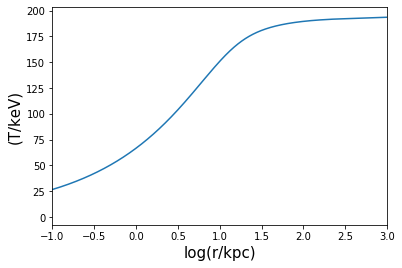

In [495]:
from scipy.integrate import odeint

kb = 1.3807 * 10**-16 
M0 = 1.312*10**48
rc = 7.097*10**22
rs = 20*rc
G = 6.6725*10**-8
mH = 1.674*10**-24
c1 = 1e-7
c2 = 2.1*10**-27


def deriv(y, r):
    phi, phi_prime, n_e, T, T_prime = y[0], y[1], y[2], y[3], y[4]
    
    dydt0 = phi_prime
    dydt1 = 2*G*M0/((r+rc)*(r+rs)**2) -(2/r)*phi_prime
    dydt2 = (-1.18*n_e*mH*phi_prime-1.9*T_prime*kb*n_e)/(1.9*kb*T)
    dydt3 = T_prime
    dydt4 = (-2*r*c1*T**(5/2)*T_prime+c2*n_e**2*T**0.5*r**2-r**2*c1*(5/2)*T**1.5*T_prime**2)/(r**2*c1*T**2.5)
    return [dydt0, dydt1, dydt2, dydt3, dydt4]


rini = 0.1
rmax = 3.086 *10**24
n = 10**7

# 2 keV = 3.204 * 10**-9 ergs or 11,600*2 K
# 0.1kpc = 3.09*10**20
# 1Mpc = 3.086 *10**24

yini = np.array([0, 0 ,0.05, 11600*2, 0])
r = np.linspace(rini, rmax, n)
y = odeint(deriv, yini, r)
phi = y[:,0]
phi_prime = y[:,1]
n_e = y[:,2]
T = y[:,3]
T_prime = y[:,4]

T_keV = T/11600
r_kpc = r/(3.086*10**21)

r_kpc_log10 = np.log10(r_kpc)

plt.plot(r_kpc_log10, T_keV)
plt.xlim(-1,3)
plt.xlabel('log(r/kpc)', fontsize = 15)
plt.ylabel('(T/keV)', fontsize = 15)
plt.show()

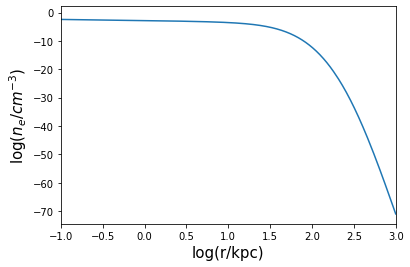

In [467]:
n_e_log10 = np.log10(n_e)
plt.plot(r_kpc_log10, n_e_log10)
plt.xlim(-1,3)

plt.xlabel('log(r/kpc)', fontsize = 15)
plt.ylabel('log($n_{e}/cm^{-3}$)', fontsize = 15)
plt.show()

### (b)

$ M(r)=\int_{0}^{r} 4\pi r^2\rho(r)dr=\int_{0}^{r} 4\pi\cdot1.18m_{H}\cdot n_{e}(r)\cdot r^2dr $

In [496]:
from scipy import integrate
solarmass = 1.989*10**33
xdd = r
ydd = 4*np.pi*1.18*mH*n_e*r**2
y_int = integrate.cumtrapz(ydd, xdd, initial=0) #초기값은 0
print("the total mass of gas within 1Mpc is {}g, {:.0f} solarmass".format(y_int[-1], y_int[-1]/solarmass))

the total mass of gas within 1Mpc is 4.696447295645738e+41g, 236121030 solarmass


## Problem 3 

### (a)

best-fit parameters a1 = 0.99377, a2 = -0.21299, a3 = 1.473951


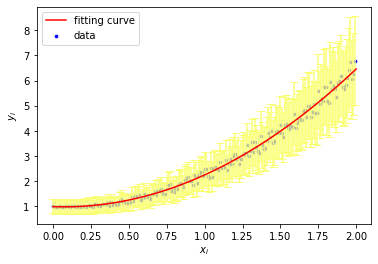

In [470]:
x, y, sigma = np.loadtxt('final-p3.txt', unpack=True, usecols=[0, 1, 2])

a3 = np.polyfit(x,y,2)[0]
a2 = np.polyfit(x,y,2)[1]
a1 = np.polyfit(x,y,2)[2]



print("best-fit parameters a1 = {:.5f}, a2 = {:.5f}, a3 = {:5f}".format(a1,a2,a3))

def lagpol(x, y, deg):
    p = np.polyfit(x, y, deg)    
    poly = np.poly1d(p)         
    return poly

x1 = np.linspace(0, 2, 100)
plt.errorbar(x,y,yerr = sigma, linestyle='None', capsize=4, color = '#F9FF76')
plt.plot(x1, lagpol(x, y, 2)(x1), label='fitting curve', color = 'red')
plt.scatter(x,y, s=7, color='blue', label = 'data')
plt.xlabel('$x_{i}$')
plt.ylabel('$y_{i}$')

plt.legend()

### (b)

In [340]:
x, y, sigma = np.loadtxt('final-p3.txt', unpack=True, usecols=[0, 1, 2])

def func(dot):
    global x, y
    a1 = dot[0]
    a2 = dot[1]
    a3 = dot[2]
    hap = 0
    for i in range(200): #200은 data size
        plus = ((y[i]-(a1+a2*x[i]+a3*x[i]**2))/sigma[i])**2
        hap = hap + plus
    return hap


def golden2D(x,dr,tol):
    R,err,loop=0.61803399, 10. , -1 
    a,b=x-dr,x+dr # initialize the range 
    while(err > TOL): 
        loop += 1 
        x1,x2=b-R*(b-a) ,a+R*(b-a) 
        f1,f2=func(x1), func(x2) 
        if (f2>f1): 
            b=x2
        else: 
            a=x1
        err=np. sqrt(sum((a-b) **2))
    xmin=a
    return xmin,err,loop

P0=np. array([1,1,1]) 
xt,yt,zt=np.array([P0[0]]),np.array([P0[1]]),np.array([P0[2]])

u=np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]]) # Cartesian unit vectors 
ut = u
loop=0 
err, TOL = 1.0, 1.0e-6 
while err>TOL: 
    loop+=1 
    u1,u2,u3=u[0],u[1],u[2] # Initialize set of directions
    #Step 2
    P1,err1,loop1 = golden2D(P0,u1, 1.0e-6) 
    P2,err2,loop2 = golden2D(P1,u2, 1.0e-6)
    P3,err3,loop3 = golden2D(P2,u3, 1.0e-6)
    
    #Step 3
    u1 = u2
    u2 = u3
    u3 = (P3-P0) /np.sqrt(sum((P2-P0)**2.)) # Unit vector로 변환
    u = np.vstack((u1,u2,u3)) 
    ut = np.vstack((ut,u3))
    #Step 4
    newP0,err_lp,loop_lp = golden2D(P3,u3, 1.0e-6)
    err = np. sqrt(sum((newP0-P0) **2. ))
    P0 = newP0
    xt,yt,zt=np.append(xt,P0[0]),np.append(yt,P0[1]),np.append(zt,P0[2])
    print (P0,loop)
    
a1_cal = xt[-1]
a2_cal = yt[-1]
a3_cal = zt[-1]
print("a1 is {:.6f}, a2 is {:.6f}, a3 is {:.6f}".format(a1_cal,a2_cal,a3_cal))

[0.65570826 0.81881276 0.98382472] 1
[0.84234728 0.47968873 0.98985036] 2
[ 0.99605085 -0.24790102  1.48803665] 3
[ 0.9960514  -0.24790535  1.48803652] 4
[ 0.99605187 -0.24790568  1.48803625] 5
a1 is 0.996052, a2 is -0.247906, a3 is 1.488036


위 계산 값은 (a)에서 구한 결과값이랑 거의 같다, 다만 a2의 계산값이 다른 값에 비하여 차이가 컷다. 그러나 두 결과값으로 직접 quadratic function을 plot하면 거의 같은 것을 시각적으로 확인할 수 있다. 

Text(0, 0.5, 'y')

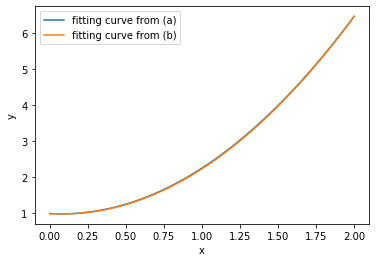

In [269]:
xlist = np.linspace(0, 2, 1000)
plt.plot(xlist, a1+a2*xlist+a3*xlist**2, label = 'fitting curve from (a)')
plt.plot(xlist, a1_cal+a2_cal*xlist+a3_cal*xlist**2, label = 'fitting curve from (b)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

## Problem 4

### (a)

Text(0.5, 0, 't elapsed from January 1950 (Month)')

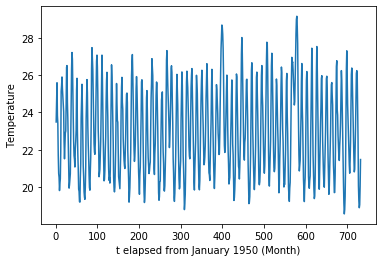

In [4]:
year, month, T = np.loadtxt('final-p4.txt', unpack=True, usecols=[0, 1, 2])

time = np.zeros(np.size(year))
for i in range(np.size(year)):
    time[i] = 12*(year[i]-year[0])+month[i]
    
plt.plot(time, T)
plt.ylabel('Temperature')
plt.xlabel('t elapsed from January 1950 (Month)')

그린 그래프를 관찰해볼 때 시간이 지남에 따라서 온도가 주기적으로 요동치는 것을 확인할 수 있다. 

### (b)

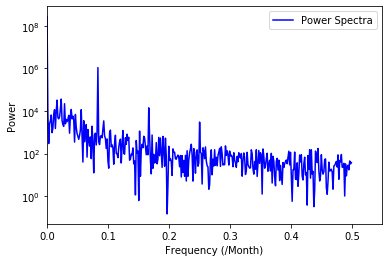

In [5]:
#============ Foruier Transform of the Data
T_fft=np.fft.fft(T)
T_fft=np.fft.fftshift(T_fft)
t_fft=np.fft.fftfreq(len(time), 1) #1 month 간격으로 측정된 값
t_fft=np.fft.fftshift(t_fft)

#============ plot the powerspectra
plt.plot(t_fft, np.absolute(T_fft)**2, color='blue', label='Power Spectra')
plt.yscale('log')
plt.ylabel('Power')
plt.xlabel('Frequency (/Month)')
plt.xlim(0,)
plt.legend()

만약 여기서 1 Month $\approx 2.628 \times 10^6 s$ 인 근사를 사용한다면 위 Power Spectra를 Hz 단위의 Frequency로 나타낼 수 있다.

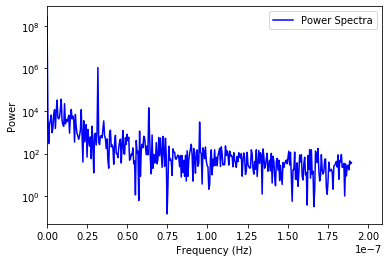

In [6]:
#============ Foruier Transform of the Data
T_fft2=np.fft.fft(T)
T_fft2=np.fft.fftshift(T_fft2)
t_fft2=np.fft.fftfreq(len(time), 2.628*10**6) #1 month 간격으로 측정된 값 = 2.628*10^6 s 
t_fft2=np.fft.fftshift(t_fft2)

#============ plot the powerspectra
plt.plot(t_fft2, np.absolute(T_fft2)**2, color='blue', label='Power Spectra')
plt.yscale('log')
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.xlim(0,)
plt.legend()

In [7]:
t_fft_pos=t_fft[t_fft>0.]
ABS = np.absolute(T_fft[t_fft>0.])**2
P_t =1./(t_fft_pos[np.argmax(ABS)])
print("the most prominent cycle of T is {} months".format(P_t))

the most prominent cycle of T is 12.0 months


이 주기에 대해서 Physical Interpretation을 생각해보면, 12 month는 지구가 태양을 도는 공전주기 이다. sea surface temperature T는 매 12 month마다 공전을 통해 태양에 대해서 같은 상대적 위치에 도달할 때마다 비슷한 온도를 가지게 되어 prominent한 cycle을 만들게 된다. 

In [8]:
new_ABS = np.sort(ABS)[::-1] # ABS를 내림차순 정렬
listABS =list(ABS)
index_2nd = listABS.index(new_ABS[1]) # 2번째로 prominent 한 주기의 위치
index_3rd = listABS.index(new_ABS[2]) # 3번째로 prominent 한 주기의 위치 
P_t_2nd =1./(t_fft_pos[index_2nd])
P_t_3rd = 1./(t_fft_pos[index_3rd])
print("the periods of the two next most prominent cycles of T is {:.2f} months and {:.2f} months".format(P_t_2nd, P_t_3rd))

the periods of the two next most prominent cycles of T is 43.06 months and 61.00 months


## Problem 5

### (a)

$M(r) =\int_{0}^{x}  4\pi r^2 \rho(r) dr = \int_{0}^{x}\pi r \sin(\pi r)dr =\frac{\sin(\pi x)}{\pi} - x\cos(\pi x)$

$\therefore r(M) = M^{-1}(r)$

Text(0, 0.5, 'y')

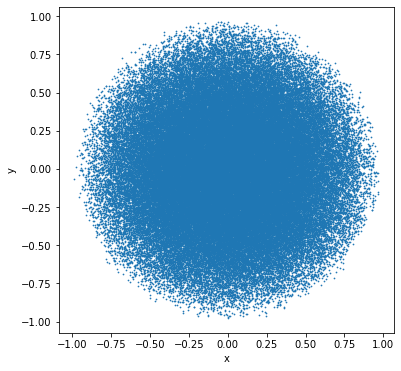

In [4]:
def func(x, k):
    return np.sin(np.pi*x)/np.pi - x*np.cos(np.pi*x)-k

def bisection_func(m, n, k):
    eps = 1.e-10
    a, b = m, n

    err = eps+1
    loop=0
    while(err>=eps):
        loop+=1
        if(loop>100): break
        fa=func(a, k)
        fb=func(b, k)
        c=0.5*(a+b)
        err=abs(c-a)
        fc=func(c, k)
        if (fa*fc<=0):
            b=c
        else:
            a=c
    return a

def inverse_mass(M):
    m=0
    n=2
    return bisection_func(m, n, M)
    

fig= plt.figure(1, figsize=(6,6))

n = 10**5
mass = 1/n

r1 = np.random.rand(n)
r2 = np.random.rand(n)
r3 = np.random.rand(n)


rds = np.zeros(n)
for i in range(np.size(rds)):
    rds[i] = inverse_mass(r1[i])

theta = np.arccos(2*r2-1)
phi = 2*np.pi*r3

x = rds*np.sin(theta) * np.cos(phi)
y = rds*np.sin(theta) * np.sin(phi)
z = rds*np.cos(theta)

r = np.sqrt(x**2 + y**2 + z**2)
idx = np.where(r<=1)
x1 = x[idx]
y1 = y[idx]
z1 = z[idx]

plt.scatter(x1, y1, s = 0.5)
plt.xlabel('x')
plt.ylabel('y')

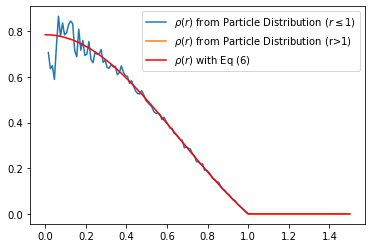

In [5]:
nbin, rmin, rmax = 100, 0.01, 1
bin = np.linspace(rmin, rmax, nbin)
freq, bin_edges = np.histogram(r, bin)
avg_r = 0.5*(bin_edges[1:]+bin_edges[0:nbin-1])
dr = (rmax - rmin)/(nbin-1)
#  = freq/float(n)/avg_r**2/(4*np.pi*dr)
den = ((freq*(1/n))/dr)*(1/(4*np.pi*avg_r**2))

plt.plot(avg_r, den, label = r'$\rho(r)$ from Particle Distribution ($r\leq1$)')
#==============
newdata = np.linspace(1, 1.5, 100)
plt.plot(newdata, np.zeros(100), label = r'$\rho(r)$ from Particle Distribution (r>1)')

# ====================
def rho(r):
    if r == 0:
        return np.pi/4
    elif r>1:
        return 0
    else:
        return np.sin(np.pi*r)/(4*r)

rset = np.linspace(0, 1.5, 10000)
result = np.zeros(np.size(rset))
for i in range(np.size(rset)):
    result[i] = rho(rset[i])
plt.plot(rset, result, label = r'$\rho(r)$ with Eq (6)', color = 'red')

plt.legend()


단, 이 때 $\displaystyle\lim_{r \rightarrow 0} \rho(r) =\displaystyle\lim_{r \rightarrow 0}\frac{\sin(\pi r)}{4r} = \frac{\pi}{4}$임을 이용하였다. 

### (b)

시간 상 $N=10^5$ 개의 입자에 대해서 Gravitational Potential을 구하기 어렵다. 우선 n1 = 10000개의 입자를 그 중 선택해서 해당 입자들의 Gravitional Potential은 아래와 같이 구할 수 있다.

In [14]:
W = 0
n1 = 50000
mass = 1/n1

for i in range(n1):
    if (i) %100 == 0:
        print(i/n1)
    for j in range(i+1, n1):
        W = W + mass**2/np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2+(z[i]-z[j])**2)
W=-W
print(W)

0.0


KeyboardInterrupt: 

In [12]:
print("The gravitational potential energy W = {:.4f}".format(W))

The gravitational potential energy W = -0.7491


In [ ]:
3분 44초면 10000일 떄 ㄱㄴ